In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

***1. Carregue o dataset e exiba as 10 primeiras linhas.***

In [ ]:
df = pd.read_csv("household_power_consumption.txt", sep=";", na_values="?", low_memory=False)

print(df.head(10))


         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   
5  16/12/2006  17:29:00                3.520                  0.522   235.02   
6  16/12/2006  17:30:00                3.702                  0.520   235.09   
7  16/12/2006  17:31:00                3.700                  0.520   235.22   
8  16/12/2006  17:32:00                3.668                  0.510   233.99   
9  16/12/2006  17:33:00                3.662                  0.510   233.86   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1

***2. Explique a diferença entre as variáveis Global_active_power e Global_reactive_power.***

Global_active_power: energia efetivamente consumida (útil).

Global_reactive_power: energia que circula mas não é usada (campos magnéticos de motores, por exemplo).

***3. Verifique se existem valores ausentes no dataset. Quantifique-os.***


In [ ]:
df.isna().sum()


,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979
Datetime,0


***4. Converta a coluna Date para o tipo datetime e crie uma nova coluna com o dia da semana
correspondente.***

In [ ]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

# Criar a coluna Datetime juntando Date + Time
df["Datetime"] = pd.to_datetime(
    df["Date"].dt.strftime("%d/%m/%Y") + " " + df["Time"],
    format="%d/%m/%Y %H:%M:%S"
)

df["Weekday"] = df["Date"].dt.day_name()

# Conferir resultado
print(df[["Date","Time","Datetime"]].head())



        Date      Time            Datetime
0 2006-12-16  17:24:00 2006-12-16 17:24:00
1 2006-12-16  17:25:00 2006-12-16 17:25:00
2 2006-12-16  17:26:00 2006-12-16 17:26:00
3 2006-12-16  17:27:00 2006-12-16 17:27:00
4 2006-12-16  17:28:00 2006-12-16 17:28:00


***5. Filtre os registros apenas do ano de 2007 e calcule a média de consumo diário de
Global_active_power***

In [ ]:
df_2007 = df[df["Date"].dt.year == 2007]
media_diaria = df_2007.groupby("Date")["Global_active_power"].mean()
print(media_diaria.head())


Date
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Name: Global_active_power, dtype: float64


***6. Gere um gráfico de linha mostrando a variação de Global_active_power em um único dia à
sua escolha.***

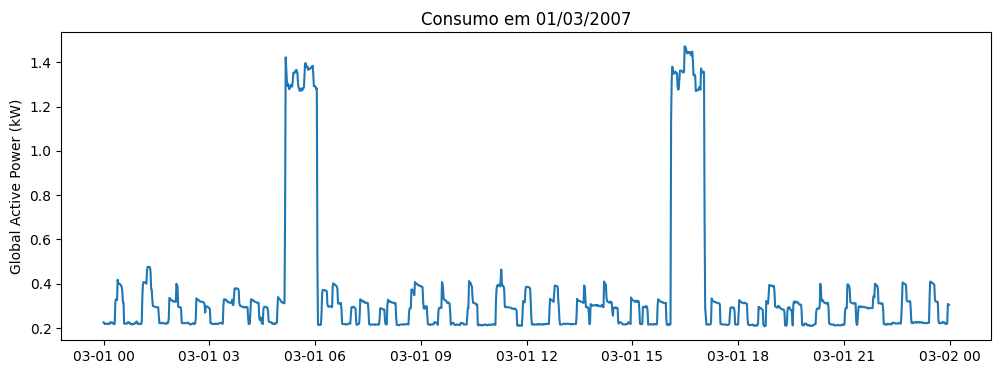

In [ ]:
um_dia = df_2007[df_2007["Date"] == "2007-03-01"]
plt.figure(figsize=(12,4))
plt.plot(um_dia["Datetime"], um_dia["Global_active_power"])
plt.title("Consumo em 01/03/2007")
plt.ylabel("Global Active Power (kW)")
plt.show()


***7. Crie um histograma da variável Voltage. O que pode ser observado sobre sua distribuição?***

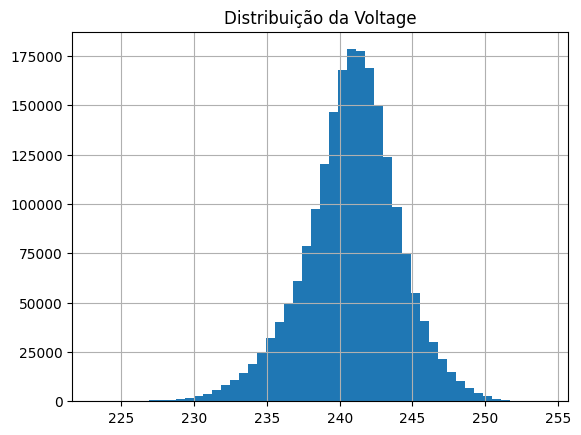

In [ ]:
df["Voltage"].hist(bins=50)
plt.title("Distribuição da Voltage")
plt.show()


***8. Calcule o consumo médio por mês em todo o período disponível no dataset.***

In [ ]:
df["YearMonth"] = df["Date"].dt.to_period("M")
consumo_mensal = df.groupby("YearMonth")["Global_active_power"].mean()

***9. Identifique o dia com maior consumo de energia ativa global (Global_active_power).***

In [ ]:
maior_consumo = media_diaria.idxmax(), media_diaria.max()

***10. Compare o consumo médio de energia ativa global em dias de semana versus finais de
semana***

In [ ]:
df["is_weekend"] = df["Weekday"].isin(["Saturday", "Sunday"])
df.groupby("is_weekend")["Global_active_power"].mean()


,Global_active_power
is_weekend,
False,1.035472
True,1.234232


***11. Calcule a correlação entre as variáveis Global_active_power, Global_reactive_power,
Voltage e Global_intensity.***

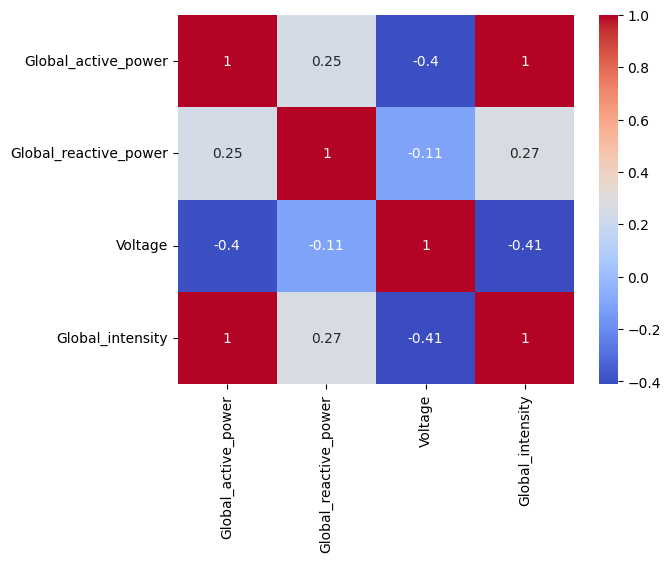

In [ ]:
corr = df[["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


***12. Crie uma nova variável chamada Total_Sub_metering que some Sub_metering_1,
Sub_metering_2 e Sub_metering_3.***

In [ ]:
df["Total_Sub_metering"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]


***13. Verifique se há algum mês em que Total_Sub_metering ultrapassa a média de
Global_active_power.
***

In [ ]:
df.groupby("YearMonth")[["Total_Sub_metering","Global_active_power"]].mean()


,Total_Sub_metering,Global_active_power
YearMonth,,
2006-12,10.873181,1.901295
2007-01,10.423518,1.546034
2007-02,9.486135,1.401084
2007-03,10.212863,1.318627
2007-04,6.839375,0.891189
2007-05,8.452442,0.985862
2007-06,7.379151,0.826814
2007-07,5.697724,0.667367
2007-08,6.979336,0.764186


***14. Faça um gráfico de série temporal do Voltage para o ano de 2008.***

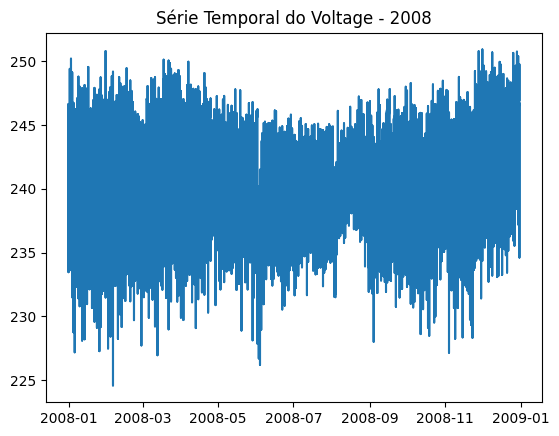

In [ ]:
df_2008 = df[df["Date"].dt.year == 2008]
plt.plot(df_2008["Date"], df_2008["Voltage"])
plt.title("Série Temporal do Voltage - 2008")
plt.show()


***15. Compare o consumo entre os meses de verão e inverno (no hemisfério norte).***

In [ ]:
df["Month"] = df["Date"].dt.month
verao = df[df["Month"].isin([6,7,8])]
inverno = df[df["Month"].isin([12,1,2])]

verao["Global_active_power"].mean(), inverno["Global_active_power"].mean()


(np.float64(0.7266815219278782), np.float64(1.4176230462106605))

***16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de
Global_active_power é semelhante à da base completa.
***

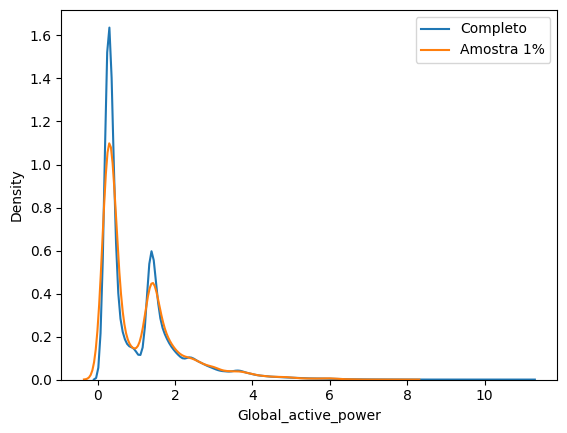

In [ ]:
amostra = df.sample(frac=0.01, random_state=42)
sns.kdeplot(df["Global_active_power"], label="Completo")
sns.kdeplot(amostra["Global_active_power"], label="Amostra 1%")
plt.legend()
plt.show()


***17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis
numéricas principais.***

In [ ]:
scaler = MinMaxScaler()
colunas = ["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]
df_norm = df.copy()
df_norm[colunas] = scaler.fit_transform(df[colunas])


***18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico.
Interprete os resultados***

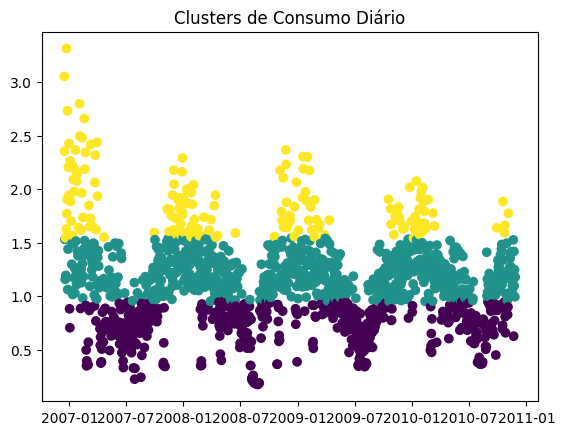

In [ ]:
dados_dia = df.groupby("Date")["Global_active_power"].mean().dropna()
X = dados_dia.values.reshape(-1,1)

kmeans = KMeans(n_clusters=3, random_state=42)
dados_dia_cluster = kmeans.fit_predict(X)

plt.scatter(dados_dia.index, dados_dia, c=dados_dia_cluster, cmap="viridis")
plt.title("Clusters de Consumo Diário")
plt.show()


***19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para
Global_active_power em um período de 6 meses.***

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/seasonal.py:358: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(xlim)


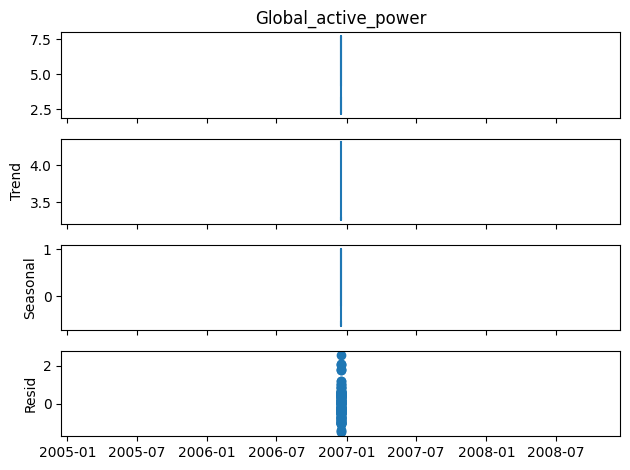

In [ ]:
serie = df.set_index("Date")["Global_active_power"].dropna()
decomp = seasonal_decompose(serie[:180], model="additive", period=30)
decomp.plot()
plt.show()


***20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de
Global_intensity. Avalie o erro do modelo.***

In [ ]:
X = df[["Global_intensity"]].dropna()
y = df["Global_active_power"].dropna()

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
erro = np.mean((y - y_pred)**2)  # MSE

print("Coef:", model.coef_, "Intercepto:", model.intercept_, "Erro Médio Quadrático:", erro)


Coef: [0.23762937] Intercepto: -0.008076494382778465 Erro Médio Quadrático: 0.0024834210470457405


***Parte 2***

21. Séries temporais por hora
- Converta Date e Time em índice datetime.
- Reamostre os dados em intervalos de 1 hora, calculando a média de Global_active_power.
- Identifique os horários de maior consumo médio ao longo do dia.
Observação: uma série temporal é um conjunto de dados registrados em ordem cronológica, útil
para identificar padrões de comportamento ao longo do tempo.

In [ ]:
# Converte tipos e cria Datetime com segurança
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors="coerce")
df["Datetime"] = pd.to_datetime(
    df["Date"].dt.strftime("%d/%m/%Y") + " " + df["Time"].astype(str),
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce"
)

# Seta índice temporal (ordenado)
df = df.sort_values("Datetime").set_index("Datetime")

# Garante numéricos
for c in ["Global_active_power","Global_reactive_power","Voltage","Global_intensity",
          "Sub_metering_1","Sub_metering_2","Sub_metering_3"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

/tmp/ipython-input-2903301611.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  gap_hourly = df["Global_active_power"].resample("1H").mean()


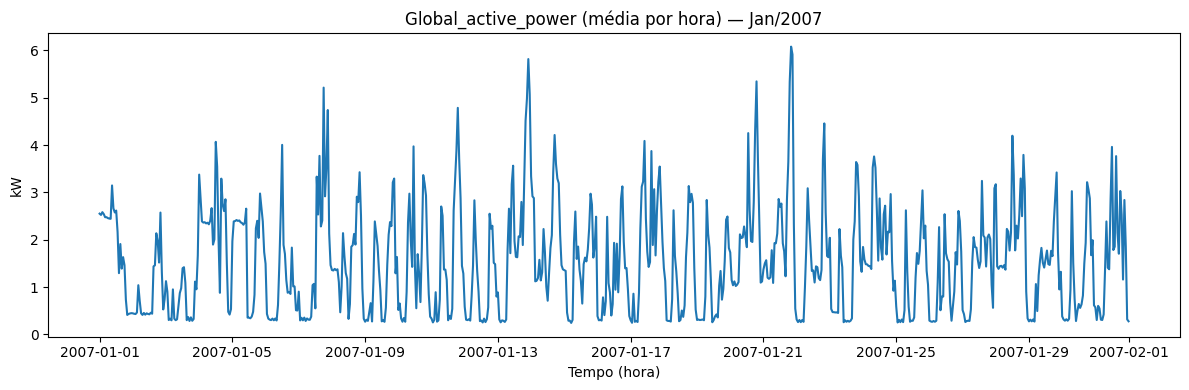

Top horários de maior consumo médio (kW):
Datetime
20    1.899073
21    1.876063
19    1.733428
7     1.502373
8     1.460940
22    1.412681
9     1.331642
18    1.326433
10    1.260913
11    1.246408
Name: Global_active_power, dtype: float64


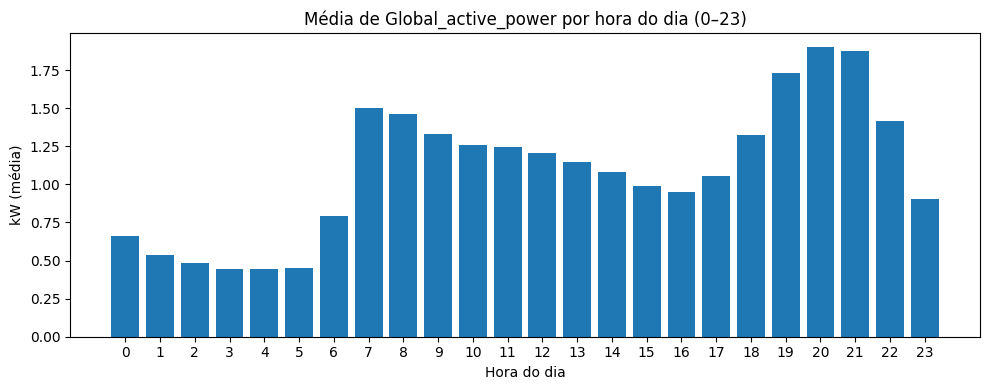

In [ ]:
# Série horária: média por hora ao longo do tempo
gap_hourly = df["Global_active_power"].resample("1H").mean()

# a) Visualização rápida da série horária (ex.: um mês para ficar legível)
exemplo_inicio = pd.Timestamp("2007-01-01")
exemplo_fim    = pd.Timestamp("2007-02-01")
serie_mes = gap_hourly.loc[exemplo_inicio:exemplo_fim]

plt.figure(figsize=(12,4))
plt.plot(serie_mes.index, serie_mes.values)
plt.title("Global_active_power (média por hora) — Jan/2007")
plt.xlabel("Tempo (hora)")
plt.ylabel("kW")
plt.tight_layout()
plt.show()

# b) Horários do dia com maior consumo médio (0–23)
#    1) Calcula média por hora-do-dia (colapsa todos os dias)
hora_do_dia = gap_hourly.groupby(gap_hourly.index.hour).mean().sort_values(ascending=False)
print("Top horários de maior consumo médio (kW):")
print(hora_do_dia.head(10))

# c) Gráfico barras dos 24 horários
ordem = np.arange(24)
medias_por_hora = gap_hourly.groupby(gap_hourly.index.hour).mean().reindex(ordem)

plt.figure(figsize=(10,4))
plt.bar(ordem, medias_por_hora.values)
plt.xticks(ordem)
plt.title("Média de Global_active_power por hora do dia (0–23)")
plt.xlabel("Hora do dia")
plt.ylabel("kW (média)")
plt.tight_layout()
plt.show()


22. Autocorrelação do consumo
- Use a série temporal de Global_active_power.
- Calcule a autocorrelação em lags de 1h, 24h e 48h.
- Pergunta: existem padrões repetidos diariamente?

In [ ]:
# Série horária já calculada no item 21
serie = gap_hourly.dropna()

acf_1h  = serie.autocorr(lag=1)    # persistência hora a hora
acf_24h = serie.autocorr(lag=24)   # padrão diário
acf_48h = serie.autocorr(lag=48)   # 2 dias

print(f"Autocorrelação 1h:  {acf_1h:.3f}")
print(f"Autocorrelação 24h: {acf_24h:.3f}")
print(f"Autocorrelação 48h: {acf_48h:.3f}")


Autocorrelação 1h:  0.713
Autocorrelação 24h: 0.435
Autocorrelação 48h: 0.399


23. Redução de dimensionalidade com PCA
- Selecione Global_active_power, Global_reactive_power, Voltage e Global_intensity.
- Aplique PCA para reduzir para 2 componentes principais.
- Analise a variância explicada por cada componente.

In [ ]:
cols = ["Global_active_power","Global_reactive_power","Voltage","Global_intensity"]
base_pca = df[cols].dropna()

# amostra para performance
base_pca = base_pca.sample(frac=0.2, random_state=42)
base_pca = base_pca.sample(n=200_000, random_state=42) if len(base_pca) > 200_000 else base_pca

scaler = StandardScaler()
X_std = scaler.fit_transform(base_pca.values)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_std)

print("Variância explicada por componente:")
for i, ratio in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PC{i}: {ratio:.3%}")

print(f"Variância acumulada (2 PCs): {pca.explained_variance_ratio_.sum():.3%}")

Variância explicada por componente:
PC1: 59.163%
PC2: 22.708%
Variância acumulada (2 PCs): 81.871%


24. Visualização de clusters no espaço PCA
- Combine os resultados do PCA com K-Means (3 clusters).
- Plote os pontos resultantes e pinte cada grupo por cluster.
- Pergunta: os grupos se separam de forma clara?

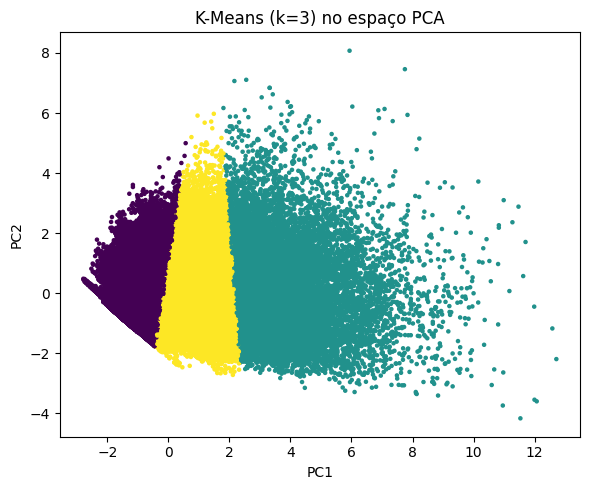

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Scatter em PCA1 x PCA2
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=5)
plt.title("K-Means (k=3) no espaço PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

25. Regressão polinomial vs linear
- Modele Global_active_power em função de Voltage.
- Compare Regressão Linear Simples com Regressão Polinomial (grau 2).
- Analise RMSE e a curva ajustada.

RMSE Linear:   0.97195
RMSE Polinial: 0.96743
Coef Linear (inclinação a): [-0.13043725]  | Intercepto (b): 32.50636732104516


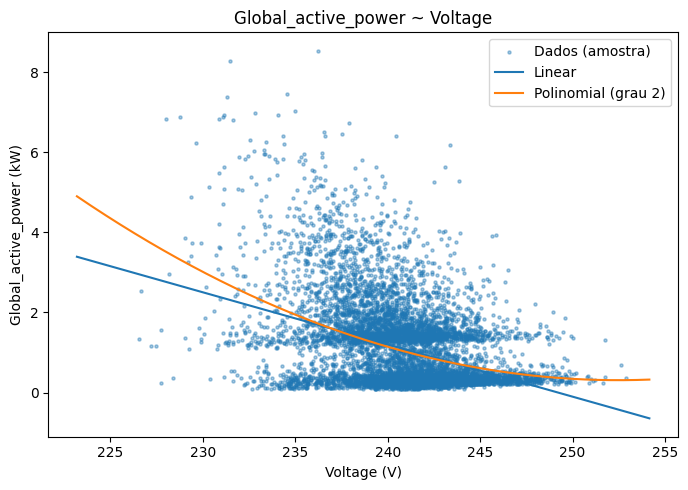

In [ ]:
for c in ["Voltage", "Global_active_power"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

base_reg = df[["Voltage", "Global_active_power"]].dropna()

X = base_reg[["Voltage"]].values
y = base_reg["Global_active_power"].values

# Split train/test (20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# --- (1) Regressão Linear ---
lin = LinearRegression()
lin.fit(X_train, y_train)
pred_lin = lin.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, pred_lin))

# --- (2) Regressão Polinomial (grau 2) ---
poly2 = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("linreg", LinearRegression())
])
poly2.fit(X_train, y_train)
pred_poly2 = poly2.predict(X_test)

rmse_poly2 = np.sqrt(mean_squared_error(y_test, pred_poly2))

# --- Resultados numéricos ---
print(f"RMSE Linear:   {rmse_lin:.5f}")
print(f"RMSE Polinial: {rmse_poly2:.5f}")
print("Coef Linear (inclinação a):", lin.coef_, " | Intercepto (b):", lin.intercept_)

# --- Visualização (amostra para não poluir) ---
amostra_plot = base_reg.sample(n=min(8000, len(base_reg)), random_state=42)
x_plot = amostra_plot["Voltage"].values.reshape(-1, 1)
y_plot = amostra_plot["Global_active_power"].values

# Curvas suavizadas (grid ordenado)
x_grid = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)
y_lin_grid  = lin.predict(x_grid)
y_poly_grid = poly2.predict(x_grid)

plt.figure(figsize=(7,5))
plt.scatter(x_plot, y_plot, s=5, alpha=0.4, label="Dados (amostra)")
plt.plot(x_grid, y_lin_grid, label="Linear")
plt.plot(x_grid, y_poly_grid, label="Polinomial (grau 2)")
plt.title("Global_active_power ~ Voltage")
plt.xlabel("Voltage (V)")
plt.ylabel("Global_active_power (kW)")
plt.legend()
plt.tight_layout()
plt.show()

26. Carregamento e inspeção inicial
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e .describe()).

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier


In [1]:
# Carregamento (CSV vem separado por vírgula)
df_app = pd.read_csv("energydata_complete.csv")

# Info e estatísticas descritivas
print(df_app.info())
print(df_app.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

27. Distribuição do consumo
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?


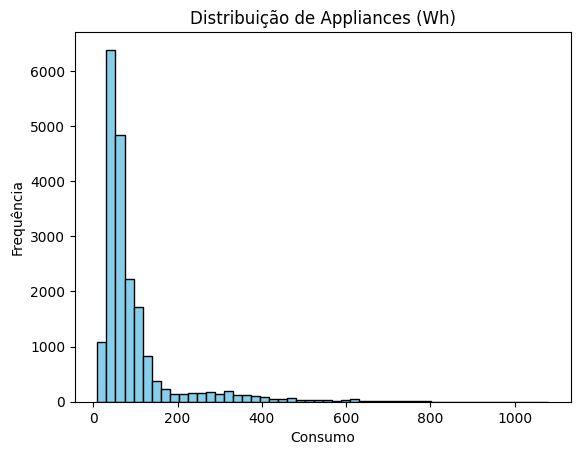

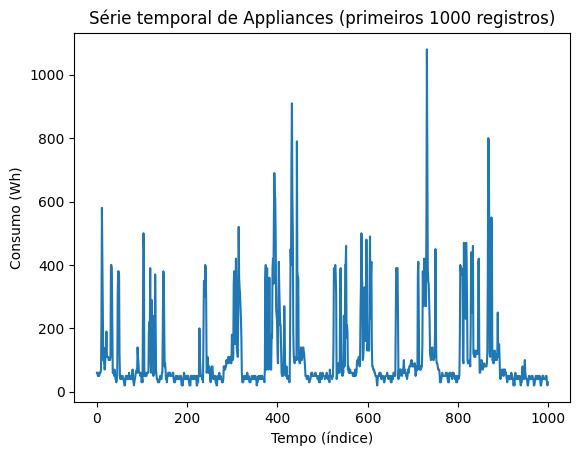

In [4]:
# Histograma
plt.hist(df_app["Appliances"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribuição de Appliances (Wh)")
plt.xlabel("Consumo")
plt.ylabel("Frequência")
plt.show()

# Série temporal (primeiros 1000 registros p/ visualização)
plt.plot(df_app.index[:1000], df_app["Appliances"][:1000])
plt.title("Série temporal de Appliances (primeiros 1000 registros)")
plt.xlabel("Tempo (índice)")
plt.ylabel("Consumo (Wh)")
plt.show()


28. Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo?

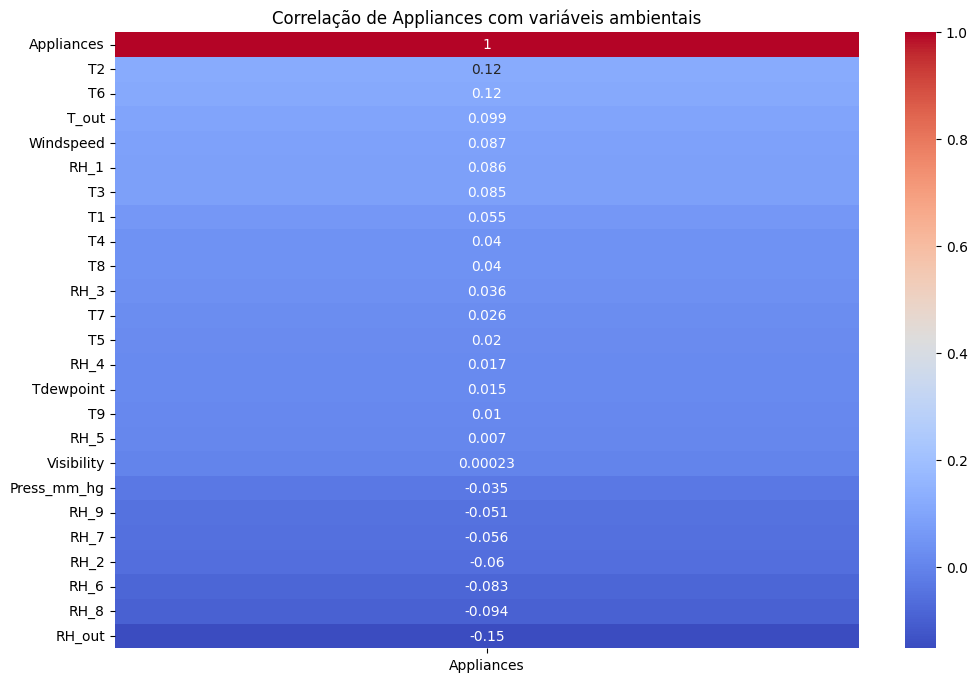

In [5]:
# Seleção de colunas ambientais principais
vars_env = ["Appliances", "T1","T2","T3","T4","T5","T6","T7","T8","T9",
            "RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9",
            "T_out","RH_out","Press_mm_hg","Windspeed","Visibility","Tdewpoint"]

corr = df_app[vars_env].corr()

import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(corr[["Appliances"]].sort_values(by="Appliances", ascending=False),
            annot=True, cmap="coolwarm")
plt.title("Correlação de Appliances com variáveis ambientais")
plt.show()


29. Normalização dos dados
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores.

In [8]:
scaler = MinMaxScaler()

df_norm = df_app.copy()
num_cols = df_app.select_dtypes(include=["float64","int64"]).columns
df_norm[num_cols] = scaler.fit_transform(df_app[num_cols])

print(df_norm.head())


                  date  Appliances    lights       T1      RH_1        T2  \
0  2016-01-11 17:00:00    0.046729  0.428571  0.32735  0.566187  0.225345   
1  2016-01-11 17:10:00    0.046729  0.428571  0.32735  0.541326  0.225345   
2  2016-01-11 17:20:00    0.037383  0.428571  0.32735  0.530502  0.225345   
3  2016-01-11 17:30:00    0.037383  0.571429  0.32735  0.524080  0.225345   
4  2016-01-11 17:40:00    0.046729  0.571429  0.32735  0.531419  0.225345   

       RH_2        T3      RH_3        T4  ...        T9      RH_9     T_out  \
0  0.684038  0.215188  0.746066  0.351351  ...  0.223032  0.677290  0.372990   
1  0.682140  0.215188  0.748871  0.351351  ...  0.226500  0.678532  0.369239   
2  0.679445  0.215188  0.755569  0.344745  ...  0.219563  0.676049  0.365488   
3  0.678414  0.215188  0.758685  0.341441  ...  0.219563  0.671909  0.361736   
4  0.676727  0.215188  0.758685  0.341441  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoi

30. PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?


Variância explicada PC1: 36.43 %
Variância explicada PC2: 21.1 %


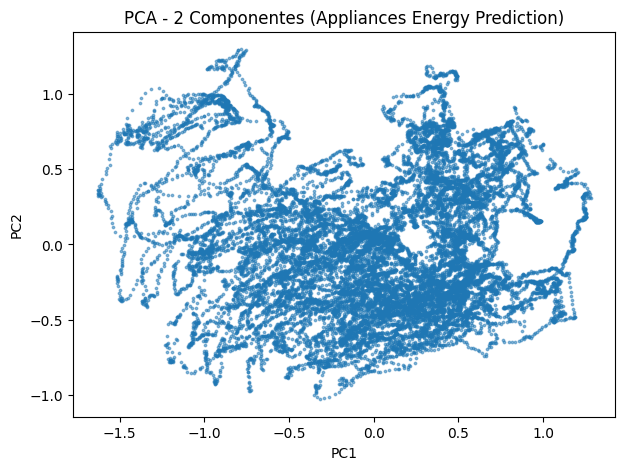

In [10]:
# Seleciona apenas variáveis numéricas normalizadas
X = df_norm[num_cols].drop(columns=["Appliances"]).dropna()

# PCA com 2 componentes
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

print("Variância explicada PC1:", round(pca.explained_variance_ratio_[0]*100,2), "%")
print("Variância explicada PC2:", round(pca.explained_variance_ratio_[1]*100,2), "%")

# Gráfico
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], s=3, alpha=0.5)
plt.title("PCA - 2 Componentes (Appliances Energy Prediction)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


31. Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio.

In [12]:
# Seleção de variáveis ambientais (exclui date/lights/rv1/rv2)
env_cols = [
    "T1","T2","T3","T4","T5","T6","T7","T8","T9",
    "RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9",
    "T_out","RH_out","Press_mm_hg","Windspeed","Visibility","Tdewpoint"
]

df_mod = df_app.dropna(subset=["Appliances"] + env_cols).copy()

X = df_mod[env_cols].values
y = df_mod["Appliances"].values  # Wh

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Pipeline com padronização (importante p/ regressão linear estável)
lin_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lin", LinearRegression())
])

lin_pipe.fit(X_train, y_train)
pred_lin = lin_pipe.predict(X_test)

r2  = r2_score(y_test, pred_lin)
rmse = np.sqrt(mean_squared_error(y_test, pred_lin))
mae  = mean_absolute_error(y_test, pred_lin)

print(f"Regressão Linear Múltipla -> R²: {r2:.4f} | RMSE: {rmse:.2f} Wh | MAE: {mae:.2f} Wh")

Regressão Linear Múltipla -> R²: 0.1459 | RMSE: 92.45 Wh | MAE: 53.44 Wh


32. Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.

In [26]:
# Amostrar para acelerar (ex.: usa 40% do treino)
# → Ajuste a fração se quiser ainda mais rápido (0.25, 0.30…)
frac_train = 0.40
rng = np.random.RandomState(42)

idx_sample = rng.choice(len(X_train), size=int(len(X_train)*frac_train), replace=False)
Xtr_fast = X_train[idx_sample]
ytr_fast = y_train[idx_sample]

# Forest mais leve: menos árvores, profundidade limitada, folhas mínimas, amostra parcial por árvore
rf = RandomForestRegressor(
    n_estimators=120,        # ↓ árvores
    max_depth=16,           # limita profundidade
    min_samples_leaf=5,     # folhas mínimas ajudam a generalizar
    max_features="sqrt",    # mais rápido
    max_samples=0.6,        # cada árvore treina com 60% dos dados (subsample)
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rf.fit(Xtr_fast, ytr_fast)
pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
mae_rf  = mean_absolute_error(y_test, pred_rf)
r2_rf   = r2_score(y_test, pred_rf)

print(f"[RF Rápido] R²: {r2_rf:.4f} | RMSE: {rmse_rf:.2f} Wh | MAE: {mae_rf:.2f} Wh")

# Importâncias (top 10)
imp = pd.Series(rf.feature_importances_, index=env_cols).sort_values(ascending=False)
print("\nTop 10 variáveis mais importantes (RF Rápido):")
print(imp.head(10))


[RF Rápido] R²: 0.3183 | RMSE: 82.59 Wh | MAE: 43.12 Wh

Top 10 variáveis mais importantes (RF Rápido):
RH_1           0.059893
RH_8           0.056532
Press_mm_hg    0.051813
T2             0.050814
T3             0.050804
RH_out         0.050667
RH_7           0.049774
RH_3           0.048522
RH_2           0.042628
RH_9           0.041614
dtype: float64


33. K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.

In [19]:
# Para clustering, normalizamos todas as variáveis ambientais
scaler_km = MinMaxScaler()
X_km = scaler_km.fit_transform(df_mod[env_cols].values)

for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_km)
    df_k = df_mod.copy()
    df_k["cluster"] = labels

    print(f"\n=== K-Means k={k} ===")
    # Perfil de consumo por cluster
    perfil = df_k.groupby("cluster")["Appliances"].agg(["mean","median","count"]).sort_values("mean")
    print(perfil)

env_profile = df_k.groupby("cluster")[env_cols].mean()
print(env_profile.round(2))



=== K-Means k=3 ===
               mean  median  count
cluster                           
1         91.508499    60.0   8883
2         96.061956    60.0   4713
0        107.900309    70.0   6139

=== K-Means k=4 ===
               mean  median  count
cluster                           
2         87.563296    60.0   7149
1         96.379349    60.0   4513
0        103.095563    60.0   2930
3        109.856115    80.0   5143

=== K-Means k=5 ===
               mean  median  count
cluster                           
4         87.945983    60.0   4406
2         92.229358    60.0   5450
1         95.736597    60.0   4290
3        107.447109    70.0   2127
0        115.141537    80.0   3462
            T1     T2     T3     T4     T5     T6     T7     T8     T9   RH_1  \
cluster                                                                         
0        22.53  21.96  23.05  22.20  20.33  12.68  21.69  23.17  20.57  37.21   
1        20.82  20.00  20.99  19.30  18.40   6.65  18.21  20.09 

34. Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

In [30]:
# 0) Sanidade: balanceamento das classes
unique, counts = np.unique(yc_train, return_counts=True)
print("Balanceamento (treino) [classe -> quantidade]:", dict(zip(unique, counts)))

# 1) Logistic Regression (baseline rápido)
logit_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(max_iter=1000, n_jobs=-1))
])
logit_pipe.fit(Xc_train, yc_train)
pred_log = logit_pipe.predict(Xc_test)

print("\n=== Logistic Regression ===")
print(classification_report(yc_test, pred_log, target_names=["Baixo","Alto"]))
print("Matriz de confusão (Logistic):\n", confusion_matrix(yc_test, pred_log))

# 2) Random Forest “turbo” (rápido)
# - Menos árvores
# - Profundidade limitada
# - Folhas mínimas > 1 (generaliza e acelera)
# - Subamostragem por árvore (max_samples)
# - max_features='sqrt' (rápido e robusto)
rf_fast = RandomForestClassifier(
    n_estimators=120,
    max_depth=16,
    min_samples_leaf=5,
    max_features="sqrt",
    max_samples=0.6,
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
    # verbose=1  # descomente se quiser ver progresso
)
rf_fast.fit(Xc_train, yc_train)
pred_rf = rf_fast.predict(Xc_test)

print("\n=== Random Forest (rápido) ===")
print(classification_report(yc_test, pred_rf, target_names=["Baixo","Alto"]))
print("Matriz de confusão (RF rápido):\n", confusion_matrix(yc_test, pred_rf))

# 3) Plano B: ExtraTrees (ainda mais rápido)
et = ExtraTreesClassifier(
    n_estimators=200,
    max_depth=16,
    min_samples_leaf=5,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42,
)
et.fit(Xc_train, yc_train)
pred_et = et.predict(Xc_test)

print("\n=== ExtraTrees (muito rápido) ===")
print(classification_report(yc_test, pred_et, target_names=["Baixo","Alto"]))
print("Matriz de confusão (ExtraTrees):\n", confusion_matrix(yc_test, pred_et))

# 4) Quem erra mais? (alto vs baixo)
def resumo_classificacao(y_true, y_pred, nome):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)  # recall da classe 'Alto'
    f1   = f1_score(y_true, y_pred, zero_division=0)
    fn_rate_alto  = fn / (fn + tp) if (fn + tp) else 0.0  # “deixou de pegar altos”
    fp_rate_baixo = fp / (fp + tn) if (fp + tn) else 0.0  # “acusou alto quando era baixo”

    print(f"\n[{nome}]")
    print("Matriz de confusão:\n", cm)
    print(f"Accuracy:  {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}  (classe 'Alto')")
    print(f"F1:        {f1:.3f}")
    print(f"Erro para ALTOS (FN rate):  {fn_rate_alto:.3f}")
    print(f"Erro para BAIXOS (FP rate): {fp_rate_baixo:.3f}")
    if fn_rate_alto > fp_rate_baixo:
        print("➡️ Erra MAIS para ALTOS (muitos falsos negativos).")
    elif fp_rate_baixo > fn_rate_alto:
        print("➡️ Erra MAIS para BAIXOS (muitos falsos positivos).")
    else:
        print("➡️ Erros semelhantes nas duas classes.")

resumo_classificacao(yc_test, pred_log, "Logistic Regression")
resumo_classificacao(yc_test, pred_rf,  "Random Forest (rápido)")
resumo_classificacao(yc_test, pred_et,  "ExtraTrees (rápido)")


Balanceamento (treino) [classe -> quantidade]: {np.int64(0): np.int64(8595), np.int64(1): np.int64(7193)}

=== Logistic Regression ===
              precision    recall  f1-score   support

       Baixo       0.76      0.76      0.76      2149
        Alto       0.71      0.72      0.72      1798

    accuracy                           0.74      3947
   macro avg       0.74      0.74      0.74      3947
weighted avg       0.74      0.74      0.74      3947

Matriz de confusão (Logistic):
 [[1626  523]
 [ 502 1296]]

=== Random Forest (rápido) ===
              precision    recall  f1-score   support

       Baixo       0.89      0.90      0.90      2149
        Alto       0.88      0.87      0.87      1798

    accuracy                           0.89      3947
   macro avg       0.89      0.89      0.89      3947
weighted avg       0.89      0.89      0.89      3947

Matriz de confusão (RF rápido):
 [[1941  208]
 [ 239 1559]]

=== ExtraTrees (muito rápido) ===
              precision  

35. Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

In [31]:
rfc = RandomForestClassifier(
    n_estimators=120,
    max_depth=16,
    min_samples_leaf=5,
    max_features="sqrt",
    max_samples=0.6,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

rfc.fit(Xc_train, yc_train)
pred_rfc = rfc.predict(Xc_test)

resumo_classificacao(yc_test, pred_log, "Logistic Regression")
resumo_classificacao(yc_test, pred_rfc, "Random Forest Classifier")


[Logistic Regression]
Matriz de confusão:
 [[1626  523]
 [ 502 1296]]
Accuracy:  0.740
Precision: 0.712
Recall:    0.721  (classe 'Alto')
F1:        0.717
Erro para ALTOS (FN rate):  0.279
Erro para BAIXOS (FP rate): 0.243
➡️ Erra MAIS para ALTOS (muitos falsos negativos).

[Random Forest Classifier]
Matriz de confusão:
 [[1941  208]
 [ 239 1559]]
Accuracy:  0.887
Precision: 0.882
Recall:    0.867  (classe 'Alto')
F1:        0.875
Erro para ALTOS (FN rate):  0.133
Erro para BAIXOS (FP rate): 0.097
➡️ Erra MAIS para ALTOS (muitos falsos negativos).
